In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np



In [2]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [3]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [4]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [5]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [6]:
def train(dataloader, model, loss_fn, optimizer,loss_history):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    loss_history['train'].append(loss.item()) 

In [7]:
def test(dataloader, model, loss_fn,loss_history):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    loss_history['test'].append(test_loss) 

In [8]:
""" 
This script contains all functions that are used to create all plots in the distance correlation network.
"""
plt.rcParams["font.family"] = "serif"
fig_width_pt = 437.46118  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
rectangular_fig_size = [fig_width,fig_height]
quadratic_fig_size = [fig_width,fig_width]

def Loss(model_history): 
    """ Plot the classifier loss
    Arguments:
    conversion: conversion type
    model_history: output history from model.fit(...)
    lambda_value: value for Loss classifier + lambda Loss distance
    save_directory: directory to save plot in
    """
    train_combined = model_history['train']
    test_combined = model_history['test']

    label_size = 12
    fig_size = rectangular_fig_size
    plt.rcParams['legend.title_fontsize'] = label_size
    fig = plt.figure(figsize=fig_size)
    gs = fig.add_gridspec(1, hspace=0)
    axs = gs.subplots(sharex=True)

    axs.tick_params(which='major', length=10)
    axs.tick_params(which='minor', length=5)
    axs.tick_params(axis='both', which='major', labelsize=10)
    axs.tick_params(axis='x', direction='in', bottom=True, labelbottom=True, top=False, labeltop=False, which='both')
    axs.tick_params(axis='y', direction='in', left=True, labelleft=True, right=False, labelright=False, which='both')
    axs.plot(train_combined, color='cornflowerblue', lw=1.5, label='training')
    axs.plot(test_combined, color='darkorange', lw=1.5, label='validation')
    axs.set_ylabel('loss', fontsize=label_size)
    axs.set_xlabel('epochs', fontsize=label_size)
    axs.grid(True)
    #axs.set_title('classifier loss', fontsize=label_size)
    legend = axs.legend(fontsize=label_size, loc="best", facecolor='grey', edgecolor='black', framealpha=0.1)
    legend._legend_box.sep = 5

    #fig.tight_layout()
    plt.savefig(f"/beegfs/desy/user/rosehenn/first_training/loss.pdf", bbox_inches='tight')
    plt.close

Epoch 1
-------------------------------
loss: 2.301921  [   64/60000]
loss: 2.288666  [ 6464/60000]
loss: 2.269572  [12864/60000]
loss: 2.262136  [19264/60000]
loss: 2.260772  [25664/60000]
loss: 2.225574  [32064/60000]
loss: 2.231150  [38464/60000]
loss: 2.204450  [44864/60000]
loss: 2.196470  [51264/60000]
loss: 2.174067  [57664/60000]
Test Error: 
 Accuracy: 42.9%, Avg loss: 2.167785 

Epoch 2
-------------------------------
loss: 2.174866  [   64/60000]
loss: 2.169039  [ 6464/60000]
loss: 2.116913  [12864/60000]
loss: 2.132961  [19264/60000]
loss: 2.105082  [25664/60000]
loss: 2.032141  [32064/60000]
loss: 2.060508  [38464/60000]
loss: 1.993748  [44864/60000]
loss: 1.988583  [51264/60000]
loss: 1.933342  [57664/60000]
Test Error: 
 Accuracy: 59.2%, Avg loss: 1.931099 

Epoch 3
-------------------------------
loss: 1.953778  [   64/60000]
loss: 1.934505  [ 6464/60000]
loss: 1.823902  [12864/60000]
loss: 1.866326  [19264/60000]
loss: 1.781319  [25664/60000]
loss: 1.705088  [32064/600

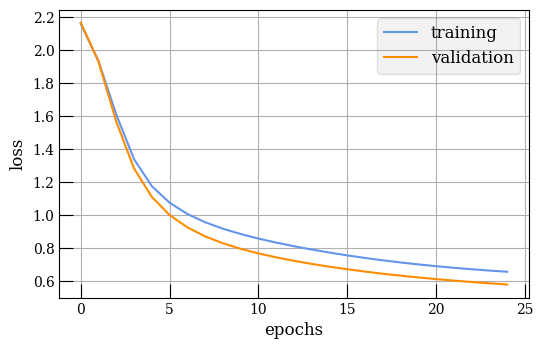

In [9]:
epochs = 25
loss_history = {'train': [], 'test': []} 
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer,loss_history)
    test(test_dataloader, model, loss_fn,loss_history)
print("Done!")
Loss(loss_history)

In [10]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [11]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [12]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"
